In [7]:
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.visualization import plot_histogram

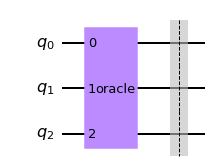

In [8]:
oracle_matrix = [
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],

]

oracle = QuantumCircuit(3)
oracle.unitary(oracle_matrix, qubits=[0, 1, 2], label='oracle')
oracle.barrier()
display(oracle.draw('mpl'))

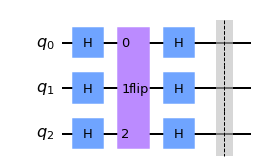

In [9]:
flip_matrix = [
    [-1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
    ]
flip = QuantumCircuit(3)
flip.unitary(flip_matrix, qubits=[0, 1, 2], label='flip')
h3 = QuantumCircuit(3)
h3.h([0, 1, 2])

diffuser = h3.compose(flip).compose(h3)
diffuser.barrier()
display(diffuser.draw('mpl'))

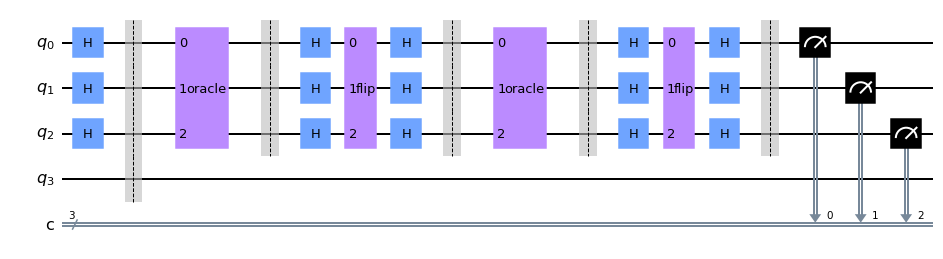

In [10]:
grover_iterate = oracle.compose(diffuser)

circ = QuantumCircuit(4, 3)
circ.h([0, 1, 2])
circ.barrier()
circ = circ.compose(grover_iterate).compose(grover_iterate)
circ.measure([0, 1, 2], [0, 1, 2])
display(circ.draw('mpl'))

In [11]:
provider = IBMQ.load_account()
backends = provider.backends(operational=True, min_num_qubits=5)
for i in backends:
    print(i)


ibmqfactory.load_account:WARNING:2024-05-12 16:38:12,113: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_sherbrooke
ibm_brisbane
ibm_kyoto
ibm_osaka


In [12]:
device = provider.get_backend('ibm_kyoto')

job = execute(circ, backend=device, shots=1000)
print(job.job_id())

result = job.result()
counts = result.get_counts(circ)

print(counts)
display(plot_histogram(counts))

cs0803r965y00084yp1g
